## Import Libraries

In [ ]:
## Import dependecies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


## import machine learning dependencies
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

## Data Collection 

In [2]:
df = pd.read_csv('Student Depression Dataset.csv')

In [3]:
df.sample(frac=1).head(3)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4619,23265,Male,28.0,Kalyan,Student,4.0,0.0,7.77,5.0,0.0,5-6 hours,Moderate,M.Ed,Yes,11.0,1.0,Yes,0
4860,24354,Male,29.0,Kolkata,Student,3.0,0.0,7.04,2.0,0.0,Less than 5 hours,Unhealthy,BCA,No,5.0,4.0,No,1
22538,113647,Female,22.0,Vadodara,Student,2.0,0.0,5.42,4.0,0.0,Less than 5 hours,Healthy,BBA,No,5.0,3.0,No,0


## Data Analysis

In [4]:
## Number of columns and rows

print(f"Number of columns : {df.shape[0]}")
print(f"Number of rows : {df.shape[1]}")

Number of columns : 27901
Number of rows : 18


In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [7]:
## checking for null values

df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

- there is only 3 values are missing we are going to remove it

In [8]:
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    8310
7-8 hours            7346
5-6 hours            6183
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

In [9]:
df['Sleep Duration'] = df['Sleep Duration'].map({'5-6 hours' : 6, 'Less than 5 hours' : 5, '7-8 hours' : 7, 'More than 8 hours' : 8, 'Others' : np.nan})

In [10]:
df.isnull().sum()

id                                        0
Gender                                    0
Age                                       0
City                                      0
Profession                                0
Academic Pressure                         0
Work Pressure                             0
CGPA                                      0
Study Satisfaction                        0
Job Satisfaction                          0
Sleep Duration                           18
Dietary Habits                            0
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          3
Family History of Mental Illness          0
Depression                                0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

## Exploratory Data Analysis

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Academic Pressure'}>],
       [<Axes: title={'center': 'Work Pressure'}>,
        <Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Study Satisfaction'}>],
       [<Axes: title={'center': 'Job Satisfaction'}>,
        <Axes: title={'center': 'Sleep Duration'}>,
        <Axes: title={'center': 'Work/Study Hours'}>],
       [<Axes: title={'center': 'Financial Stress'}>,
        <Axes: title={'center': 'Depression'}>, <Axes: >]], dtype=object)

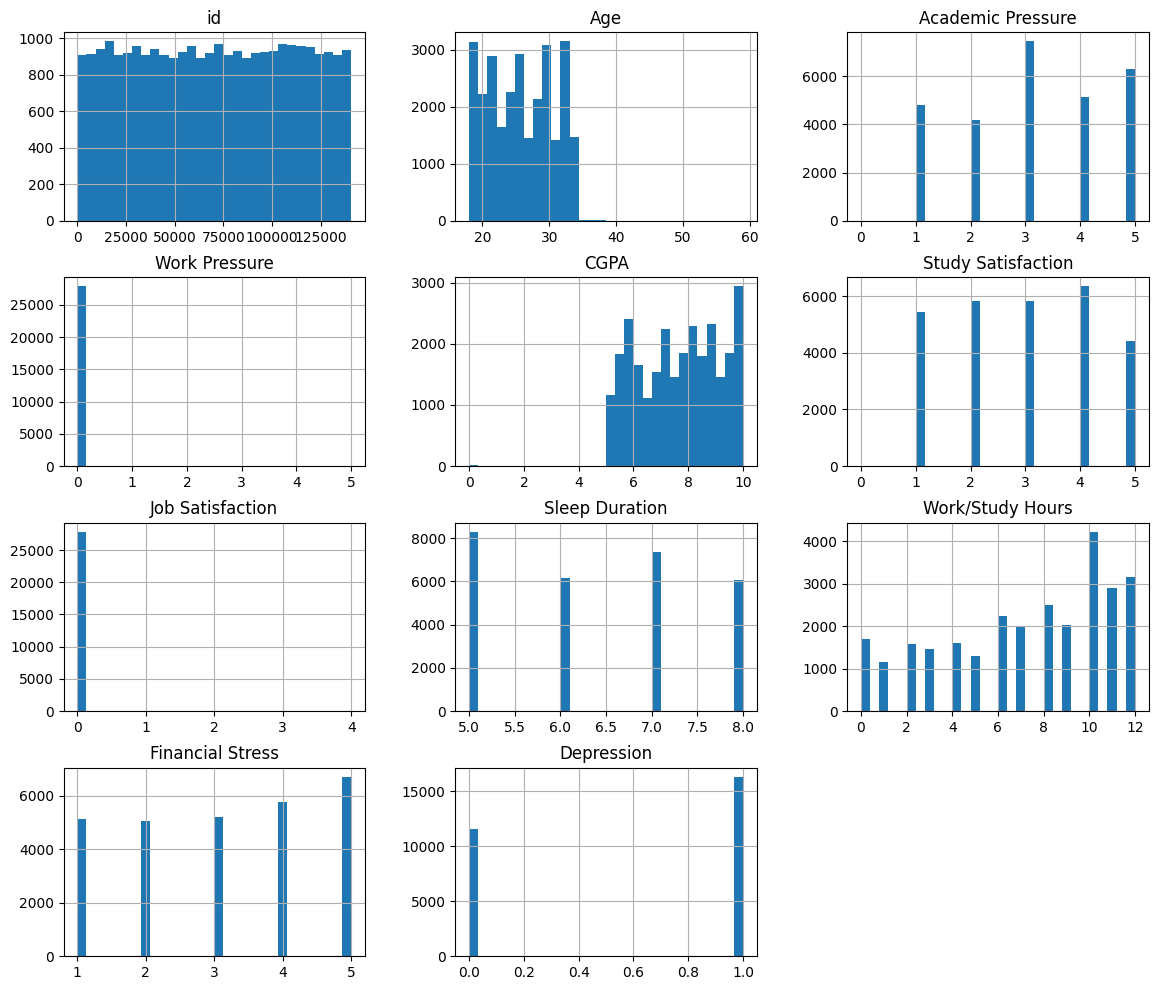

In [13]:
## histogram plot 

df.hist(bins = 30, figsize=(14,12))

- There is no sense to keep work presssure or job satisfaction because there are all students.
- Studet age inbetween 20 to 35.
- Some stundet feel Academic Pressure and find out relation b/w Academic pressure and CGPA.
- All Students CGPA is above 5.
- Many students are not Satisfied with Study Satisfaction.
- We have to find out relation of study hours and CGPA.
- Many students facing Financial crisis.

- ## We are divide students who have depression or not and analysis further detail.

In [14]:
students_with_depression = df[df['Depression']==1]
students_without_depression = df[df['Depression']==0]

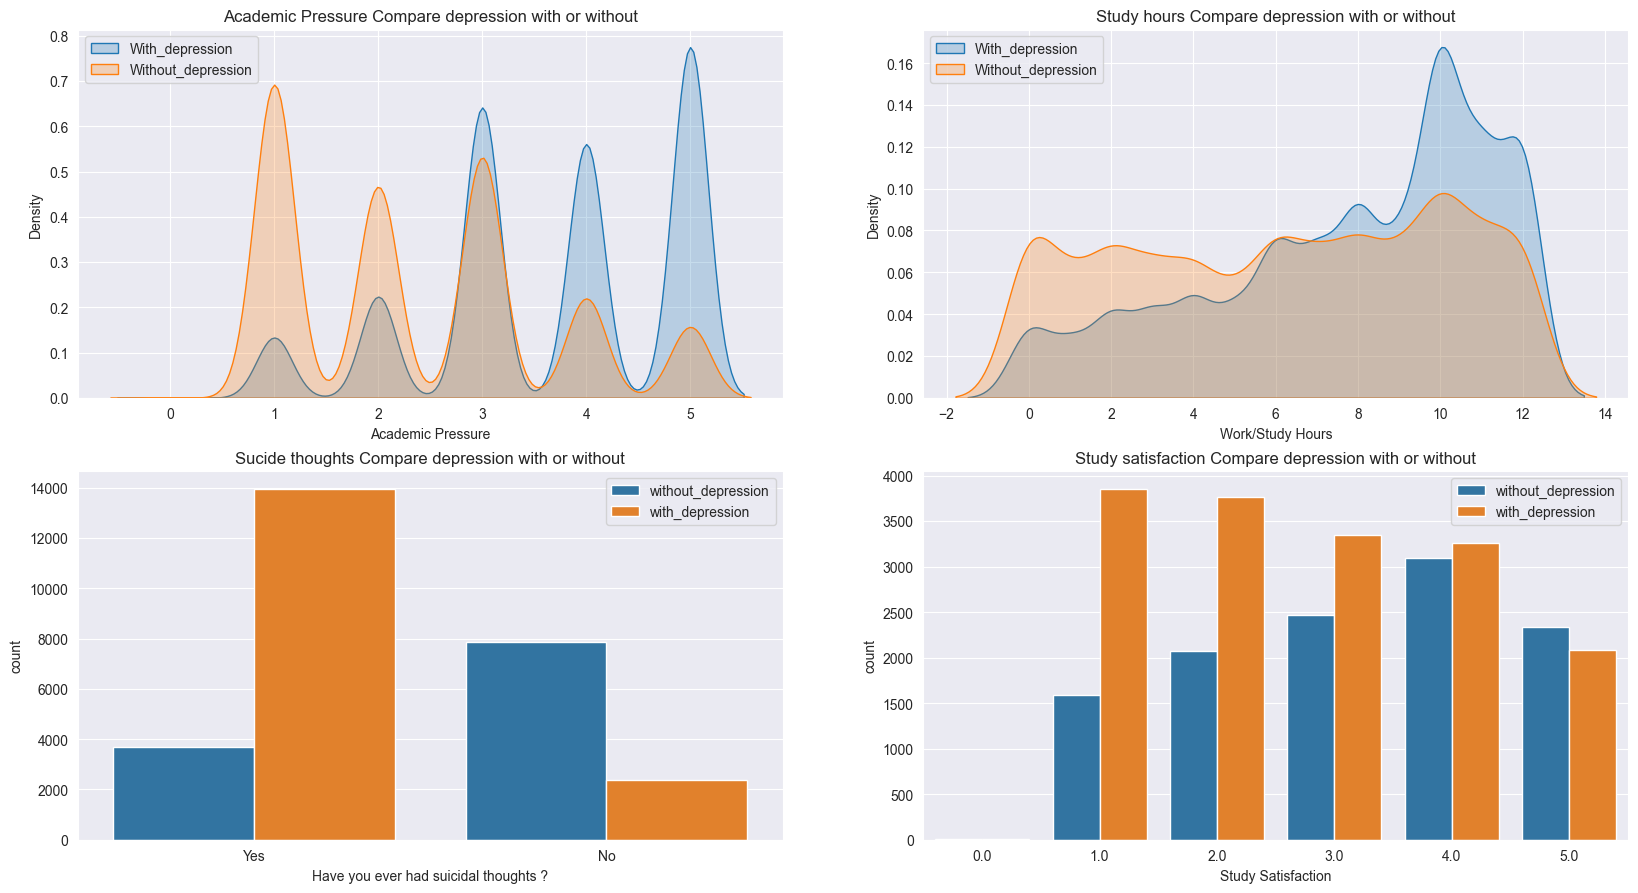

In [15]:
plt.figure(figsize=(20,22))
sns.set_style(style='darkgrid')

plt.subplot(4,2,1)
sns.kdeplot(students_with_depression['Academic Pressure'], fill=True, cbar='b', label='With_depression')
sns.kdeplot(students_without_depression['Academic Pressure'], fill=True, cbar='r', label='Without_depression')
plt.title('Academic Pressure Compare depression with or without')
plt.legend()


plt.subplot(4,2,2)
sns.kdeplot(students_with_depression['Work/Study Hours'], fill=True, cbar='b', label='With_depression')
sns.kdeplot(students_without_depression['Work/Study Hours'], fill=True, cbar='r', label='Without_depression')
plt.title('Study hours Compare depression with or without')
plt.legend()


plt.subplot(4,2,3)
sns.countplot(x = df['Have you ever had suicidal thoughts ?'], hue=df['Depression'])
plt.title('Sucide thoughts Compare depression with or without')
plt.legend(['without_depression', 'with_depression'])


plt.subplot(4,2,4)
sns.countplot(data=df, x='Study Satisfaction', hue='Depression')
plt.title('Study satisfaction Compare depression with or without')
plt.legend(['without_depression', 'with_depression'])


plt.show()

- Student who has Higher Academic Pressure with have More Depression Thoughts.
- Student who study more than 6 hours has higher chances go to Depression.
- Depression people has more thoughts of sucide we have to and talk to them.
- Most student is not satisfied with their study material.

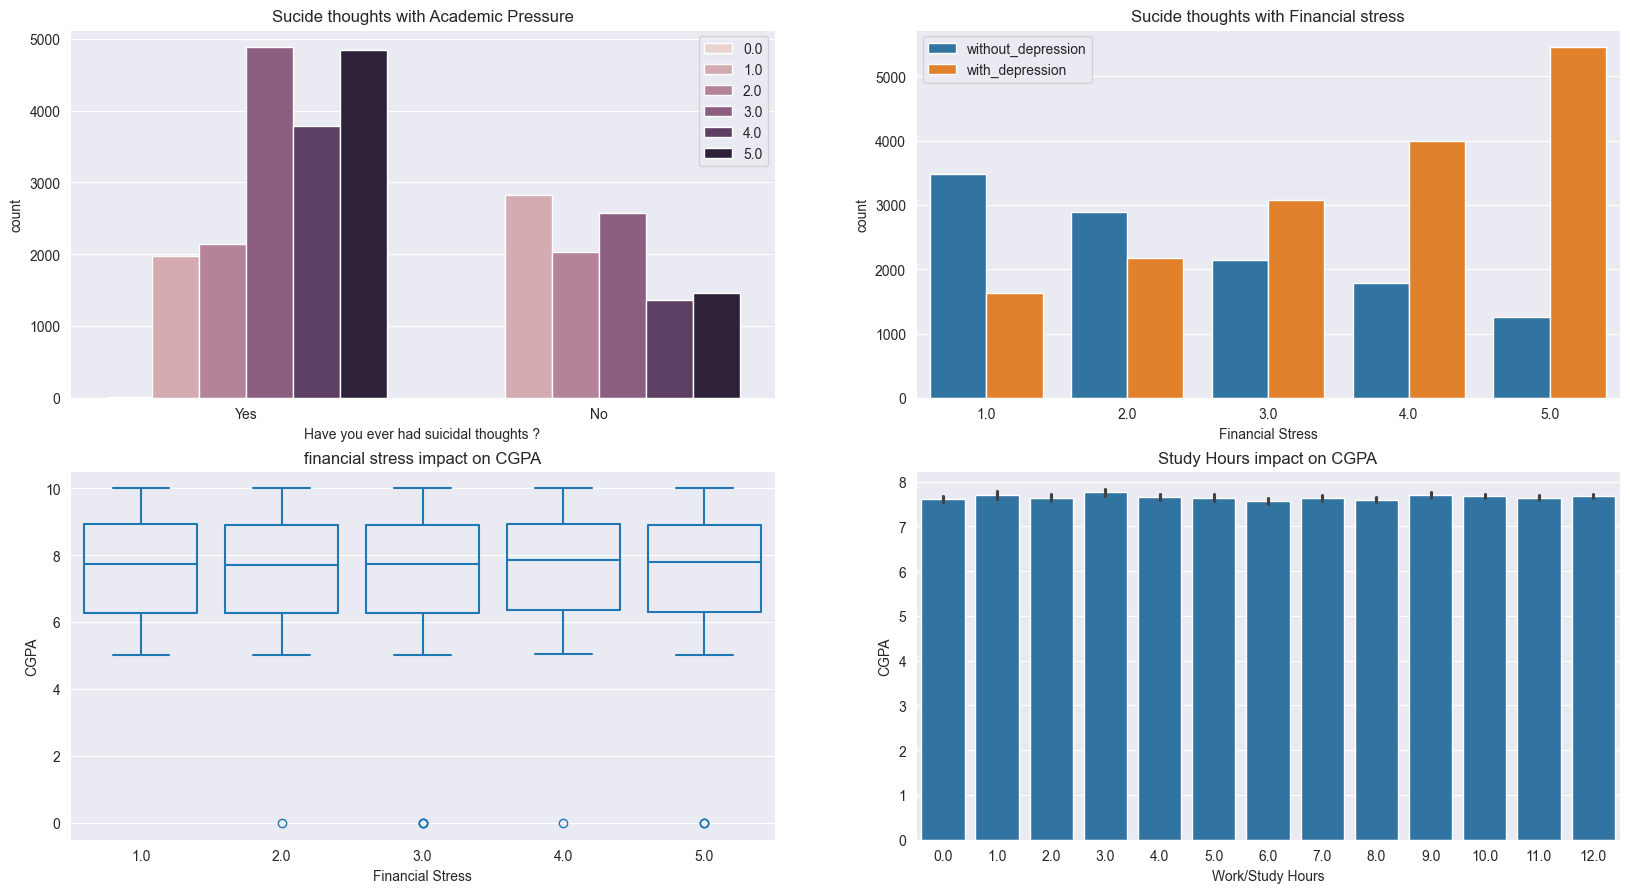

In [16]:
plt.figure(figsize=(20,22))
sns.set_style(style='darkgrid')

plt.subplot(4,2,1)
sns.countplot(x = df['Have you ever had suicidal thoughts ?'], hue=df['Academic Pressure'])
plt.title('Sucide thoughts with Academic Pressure')
plt.legend()


plt.subplot(4,2,2)
sns.countplot(x = df['Financial Stress'], hue=df['Depression'])
plt.title('Sucide thoughts with Financial stress')
plt.legend(['without_depression', 'with_depression'])


plt.subplot(4,2,3)
sns.boxplot(x = df['Financial Stress'], y=df['CGPA'], fill=False, )
plt.title('financial stress impact on CGPA')


plt.subplot(4,2,4)
sns.barplot(x=df['Work/Study Hours'], y=df['CGPA'])
plt.title('Study Hours impact on CGPA')


plt.show()

- If Academic Pressue rises on student there if high chances they go to depression.
- In family Financial stress arises or in this greater than 3 students highly chances with Depressio
- Financial Stress does not impact on CGPA but depends on how much hours he/she study or how brilliant he /she is.
- In this dataset i have not seen any impact of study hours on CGPA but it Should be impact on CGPA.

<Axes: ylabel='CGPA'>

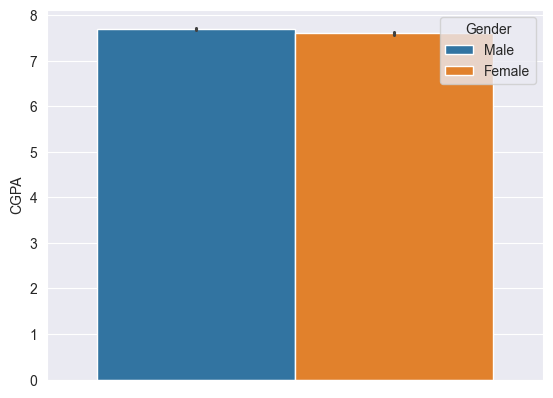

In [17]:
sns.barplot(data=df,y='CGPA' ,hue=df['Gender'])

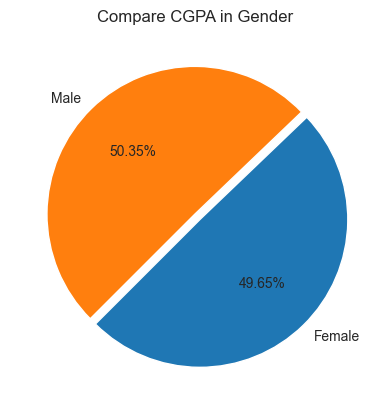

In [18]:
CGPA_AVG = df.groupby('Gender')['CGPA'].mean()

plt.pie(CGPA_AVG, autopct='%0.2f%%', labels=CGPA_AVG.index, startangle=-135, explode=[0.05, 0])
plt.title('Compare CGPA in Gender')
plt.show()

- Male has higher CGPA compare to female

## Preprocessing

In [19]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [20]:
df['Profession'].value_counts()

Profession
Student                   27849
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

- Student has the highest values compared to other professions so we can remove all other professions
- we have seen before that work_pressure and job_satisfaction is not necessary, remove them and the id column.

In [21]:
df = df[df['Profession']=='Student']

- Removed all the Professions except students so there are all students so we can remove this profession column.

In [22]:
df.drop(columns=['id', 'Work Pressure', 'Job Satisfaction', 'Profession', 'City'], axis = 1, inplace=True)

In [23]:
df.head(1)

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,6.0,Healthy,B.Pharm,Yes,3.0,1.0,No,1


- ## Label Encoding

In [24]:
df.dtypes

Gender                                    object
Age                                      float64
Academic Pressure                        float64
CGPA                                     float64
Study Satisfaction                       float64
Sleep Duration                           float64
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [25]:
# Checking for string/object columns.

[cols for cols in df.columns if df[cols].dtype == 'object']

['Gender',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

In [26]:
df['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

In [27]:
df['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed',
       'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Com',
       'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech', 'BBA',
       'ME', 'MHM', 'Others'], dtype=object)

In [28]:
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender']) ## 1 -> Male 0 -> Female
df['Family History of Mental Illness'] = le.fit_transform(df['Family History of Mental Illness']) ## 0 -> No 1 -> Yes
df['Have you ever had suicidal thoughts ?'] = le.fit_transform(df['Have you ever had suicidal thoughts ?']) ## 1 -> Yes 0 -> No
df['Degree'] = le.fit_transform(df['Degree'])

In [29]:
df['Dietary Habits'] = df['Dietary Habits'].map({'Unhealthy' : 0, 'Moderate' : 1, 'Healthy' : 2, 'Others' : np.nan})


In [30]:
df.isnull().sum()

Gender                                    0
Age                                       0
Academic Pressure                         0
CGPA                                      0
Study Satisfaction                        0
Sleep Duration                            0
Dietary Habits                           12
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
dtype: int64

In [31]:
df.dropna(inplace = True)

In [32]:
df.isnull().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [33]:
df.shape

(27837, 13)

## Machine Learning

In [35]:
df.sample(frac=1).head(4)

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
13067,1,22.0,3.0,9.46,4.0,7.0,2.0,25,1,2.0,5.0,0,0
27027,1,19.0,3.0,8.74,3.0,6.0,2.0,11,1,10.0,3.0,0,1
11970,1,32.0,1.0,7.48,3.0,7.0,1.0,21,0,10.0,4.0,1,0
3929,1,32.0,3.0,7.10,1.0,5.0,1.0,25,1,7.0,1.0,1,0


- ### Splitting

In [36]:
x = df.drop('Depression', axis=1)
y = df['Depression']

- ### Splitting into train and test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

In [38]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train shape (22269, 12)
X_test shape (5568, 12)
y_train (22269,)
y_test (5568,)


- ## Logistic Regression

In [39]:
clf_log = LogisticRegression()

clf_log.fit(X_train, y_train)

LogisticRegression()

In [40]:
pred_log = clf_log.predict(X_test)

print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2268
           1       0.86      0.88      0.87      3300

    accuracy                           0.85      5568
   macro avg       0.84      0.84      0.84      5568
weighted avg       0.85      0.85      0.85      5568



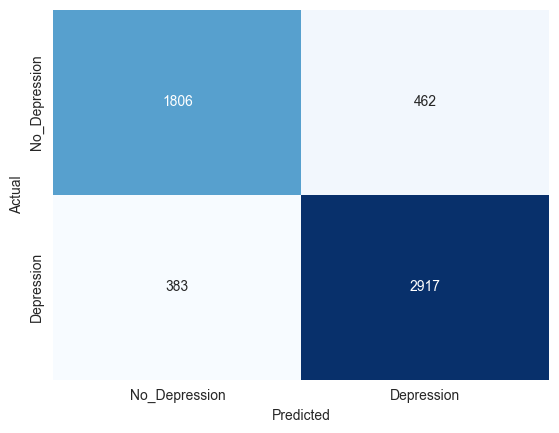

In [41]:
cm_log = confusion_matrix(y_test, pred_log)

sns.heatmap(cm_log, annot=True, fmt='0.0f', cbar=False, cmap='Blues', xticklabels=['No_Depression', 'Depression'], yticklabels=['No_Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
accuracy_log = metrics.accuracy_score(y_test, pred_log)
accuracy_log

0.8482399425287356

- ## Decision Tree

In [43]:
clf_dt = DecisionTreeClassifier()

clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
pred_dt = clf_dt.predict(X_test)

In [45]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      2268
           1       0.81      0.80      0.80      3300

    accuracy                           0.77      5568
   macro avg       0.76      0.77      0.76      5568
weighted avg       0.77      0.77      0.77      5568



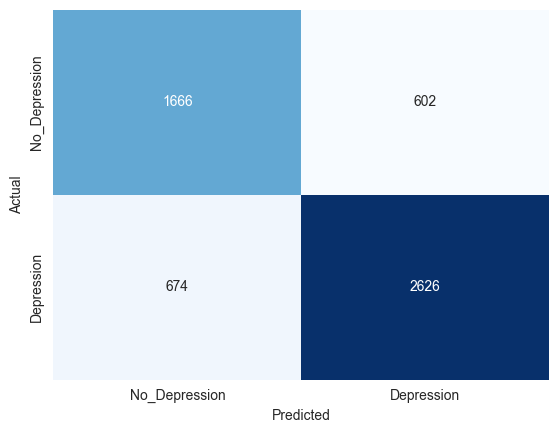

In [46]:
cm_dt = confusion_matrix(y_test, pred_dt)

sns.heatmap(cm_dt, annot=True, fmt='0.0f', cbar=False, cmap='Blues', xticklabels=['No_Depression', 'Depression'], yticklabels=['No_Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:

accuracy_dt = metrics.accuracy_score(y_test, pred_dt)
accuracy_dt

0.7708333333333334

- ## Random Forest

In [48]:
clf_forest = RandomForestClassifier()

clf_forest.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
pred_forest = clf_forest.predict(X_test)

In [50]:
print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2268
           1       0.86      0.88      0.87      3300

    accuracy                           0.84      5568
   macro avg       0.84      0.84      0.84      5568
weighted avg       0.84      0.84      0.84      5568



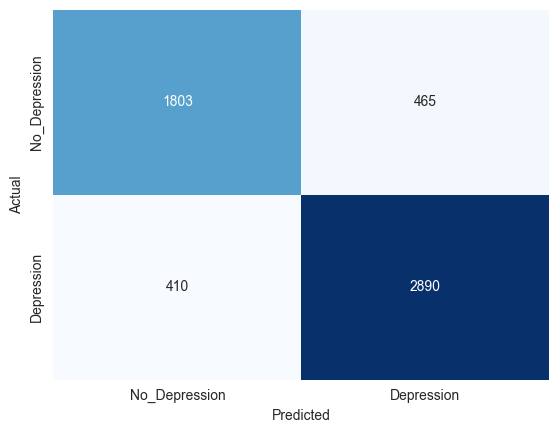

In [51]:
cm_forest = confusion_matrix(y_test, pred_forest)

sns.heatmap(cm_forest, annot=True, fmt='0.0f', cbar=False, cmap='Blues', xticklabels=['No_Depression', 'Depression'], yticklabels=['No_Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
accuracy_forest = metrics.accuracy_score(y_test, pred_forest)
accuracy_forest

0.8428520114942529

- ## Naive Baye's

In [53]:
clf_bayes = MultinomialNB()

clf_bayes.fit(X_train, y_train)

MultinomialNB()

In [54]:
pred_bayes = clf_bayes.predict(X_test)

In [55]:
print(classification_report(y_test, pred_bayes))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75      2268
           1       0.81      0.88      0.84      3300

    accuracy                           0.81      5568
   macro avg       0.81      0.79      0.80      5568
weighted avg       0.81      0.81      0.80      5568



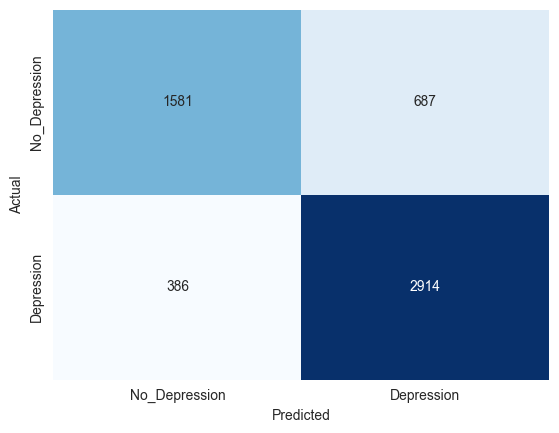

In [56]:
cm_bayes = confusion_matrix(y_test, pred_bayes)

sns.heatmap(cm_bayes, annot=True, fmt='0.0f', cbar=False, cmap='Blues', xticklabels=['No_Depression', 'Depression'], yticklabels=['No_Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [57]:
accuracy_bayes = metrics.accuracy_score(y_test, pred_bayes)
accuracy_bayes

0.8072916666666666

- ## Support vector machine

In [58]:
clf_svm = SVC()

clf_svm.fit(X_train, y_train)

SVC()

In [59]:
pred_svm = clf_svm.predict(X_test)

In [60]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2268
           1       0.86      0.89      0.88      3300

    accuracy                           0.85      5568
   macro avg       0.85      0.84      0.84      5568
weighted avg       0.85      0.85      0.85      5568



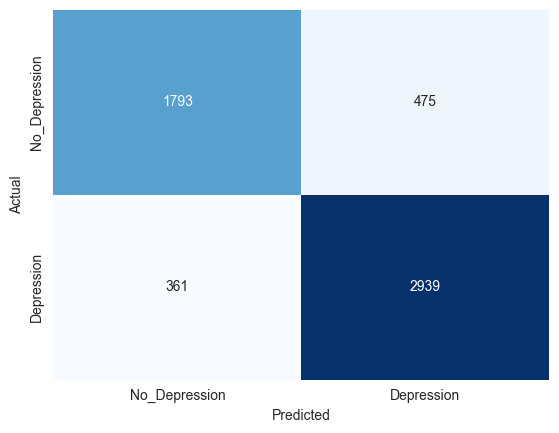

In [61]:
cm_svm = confusion_matrix(y_test, pred_svm)

sns.heatmap(cm_svm, annot=True, fmt='0.0f', cbar=False, cmap='Blues', xticklabels=['No_Depression', 'Depression'], yticklabels=['No_Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [62]:
accuracy_svm = metrics.accuracy_score(y_test, pred_svm)
accuracy_svm

0.8498563218390804

- ## K nearest Neighbors

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
clf_neighbor = KNeighborsClassifier()

clf_neighbor.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
pred_n = clf_neighbor.predict(X_test)

In [66]:
print(classification_report(y_test, pred_n))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      2268
           1       0.80      0.85      0.82      3300

    accuracy                           0.79      5568
   macro avg       0.78      0.77      0.77      5568
weighted avg       0.78      0.79      0.78      5568



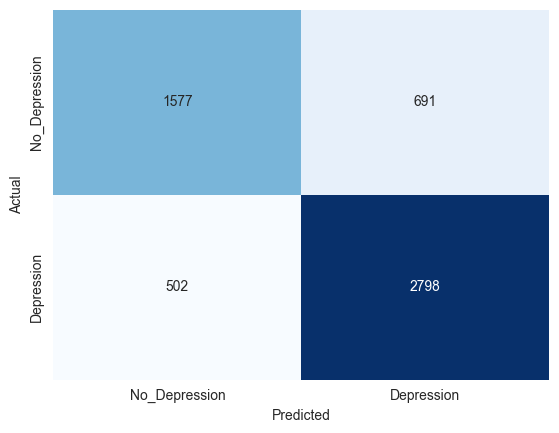

In [67]:
cm_n = confusion_matrix(y_test, pred_n)

sns.heatmap(cm_n, annot=True, fmt='0.0f', cbar=False, cmap='Blues', xticklabels=['No_Depression', 'Depression'], yticklabels=['No_Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [68]:
accuracy_n = metrics.accuracy_score(y_test, pred_n)
accuracy_n

0.7857399425287356

- ## Comparing accuracy score

In [69]:
name = ['LogisticRegression', 'DecisionTree', 'RandomForest',  "Naivebaye's" ,'SupportVectorMachine', 'KNearestNeighbors']
score = [accuracy_log, accuracy_dt, accuracy_forest, accuracy_bayes, accuracy_svm, accuracy_n]

In [70]:
score

[0.8482399425287356,
 0.7708333333333334,
 0.8428520114942529,
 0.8072916666666666,
 0.8498563218390804,
 0.7857399425287356]

In [71]:
score_df = pd.DataFrame(index=name, data=score, columns=['score'])

In [72]:
score_df.sort_values(by='score')[::-1]

,score
SupportVectorMachine,0.849856
LogisticRegression,0.848240
RandomForest,0.842852
Naivebaye's,0.807292
KNearestNeighbors,0.785740
DecisionTree,0.770833


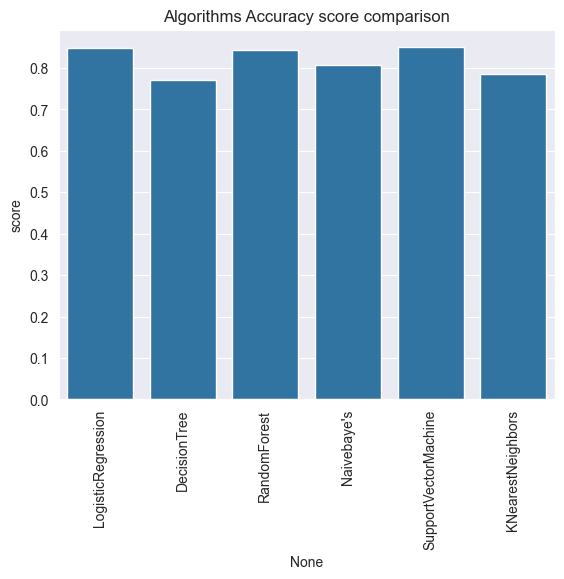

In [73]:
sns.barplot(data= score_df, x=score_df.index, y='score')
plt.xticks(rotation = 90)
plt.title('Algorithms Accuracy score comparison')
plt.show()

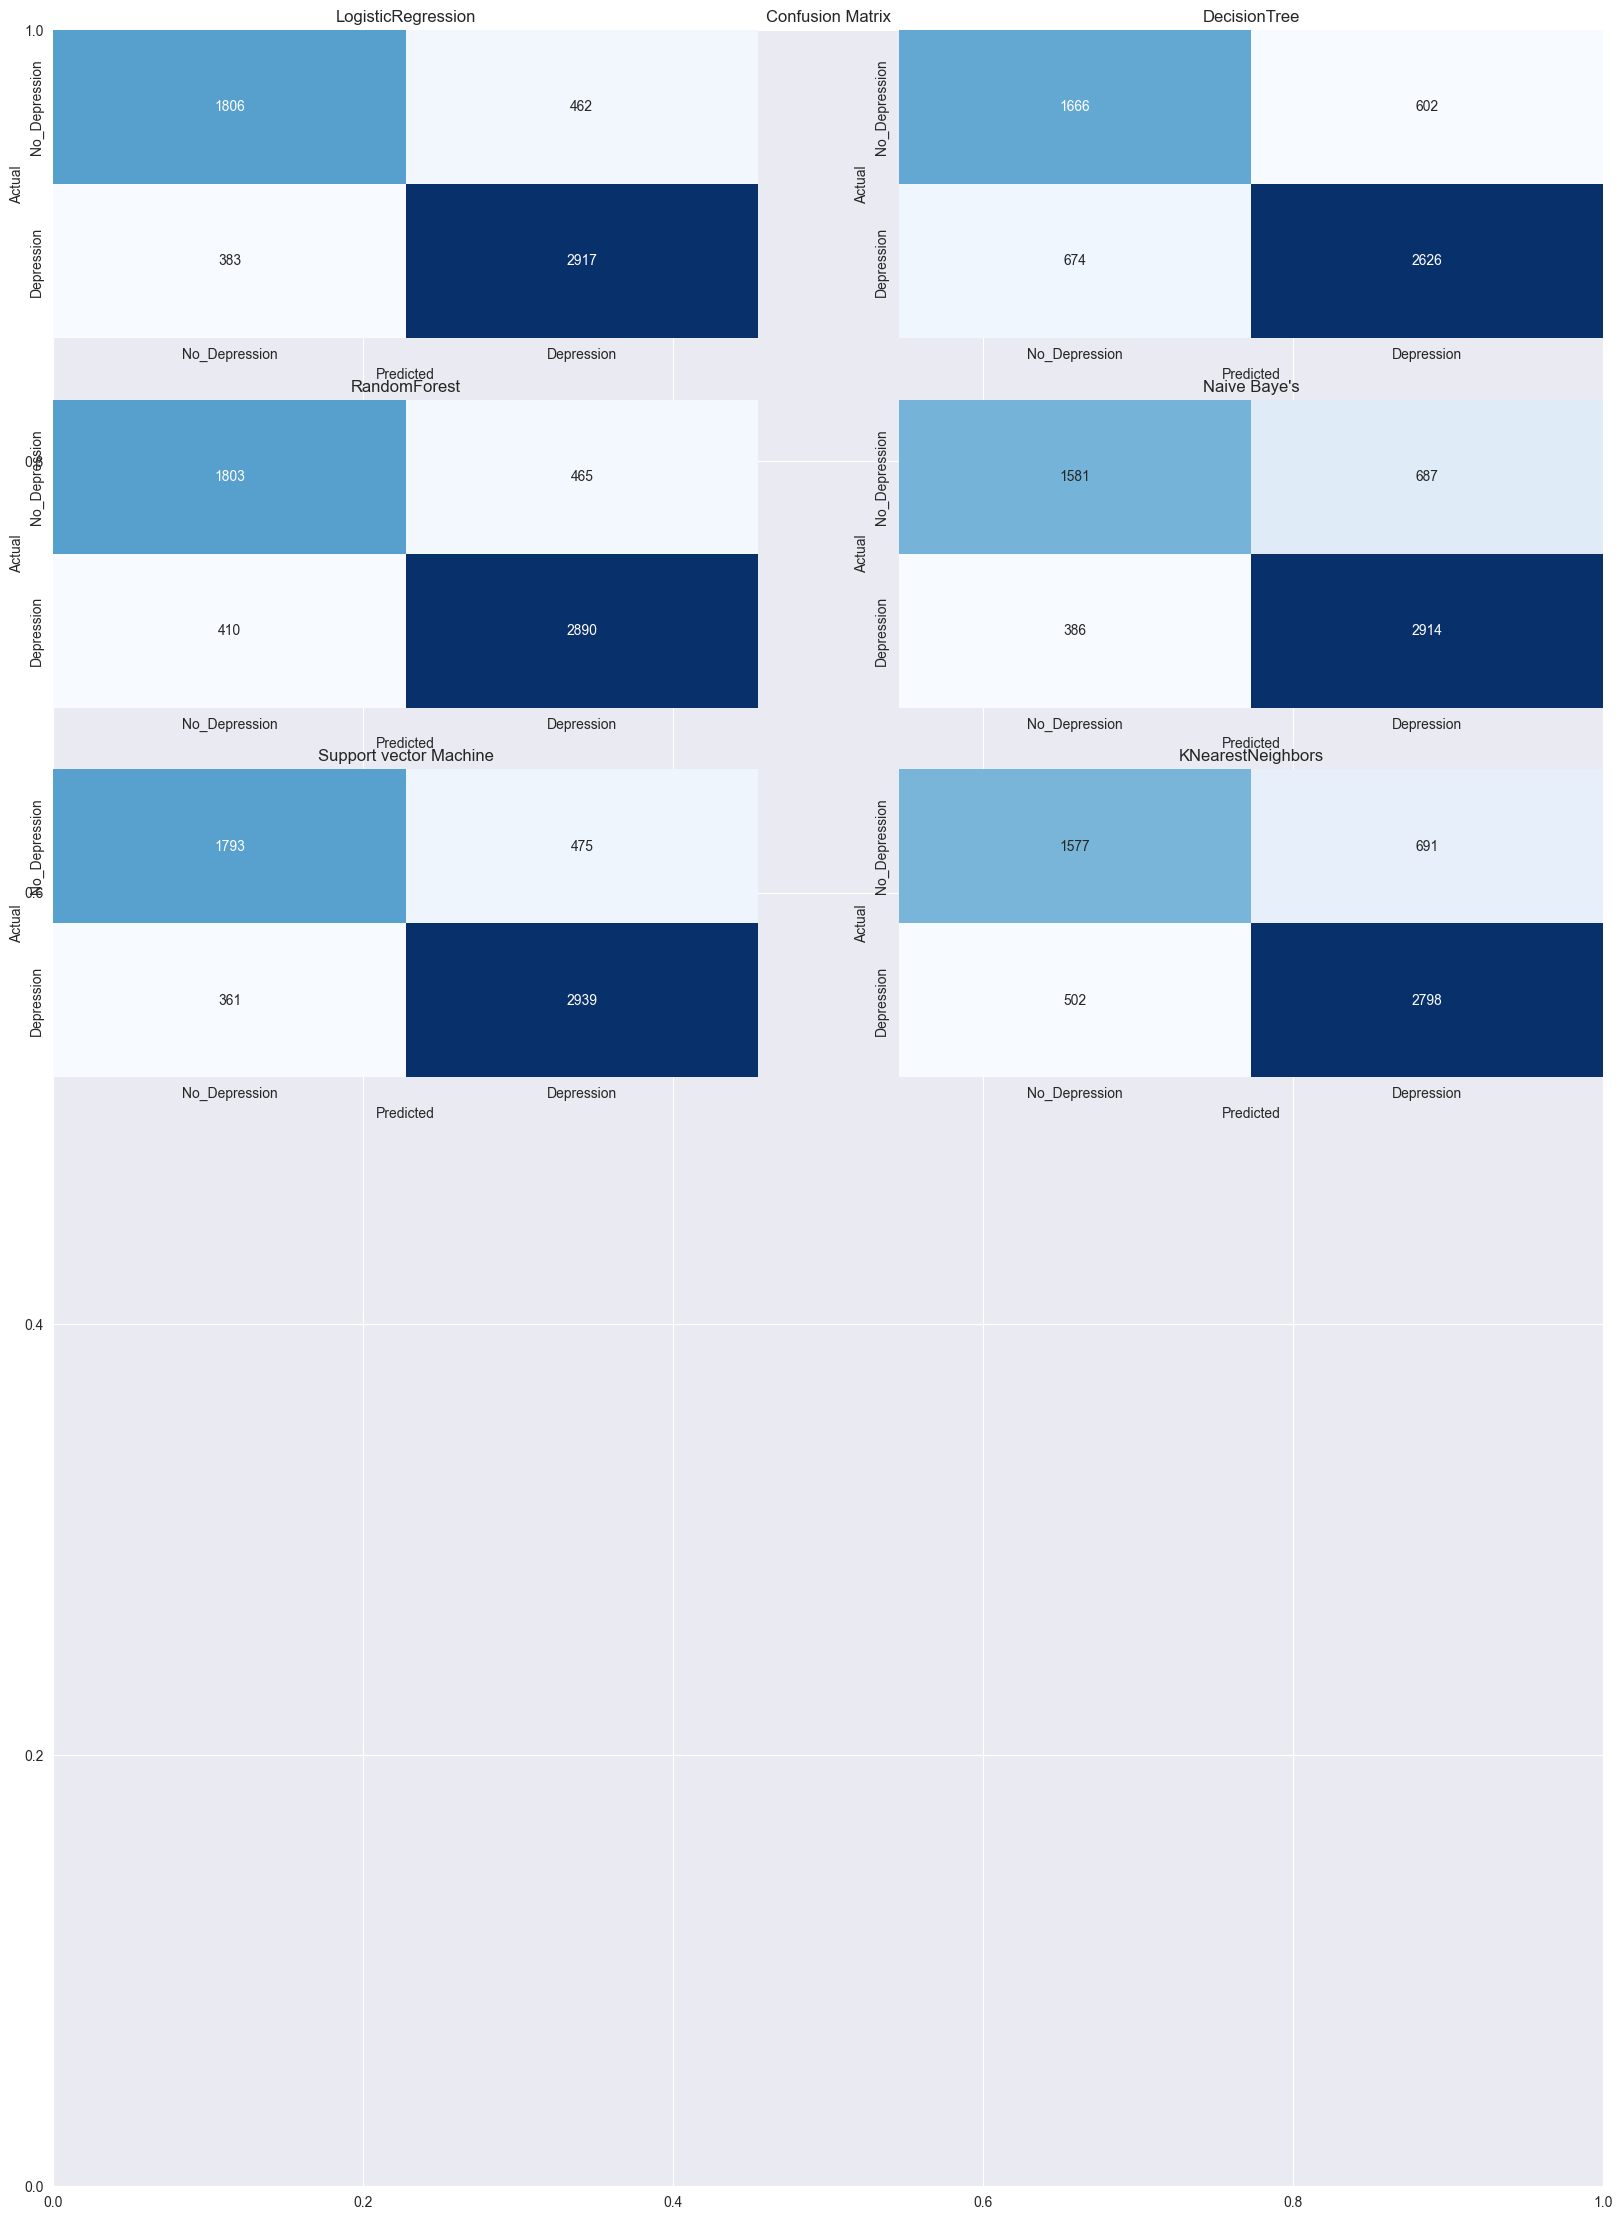

In [74]:
plt.figure(figsize=(20,28))
plt.title('Confusion Matrix')


plt.subplot(6,2,1)
sns.heatmap(cm_log, annot=True, fmt='0.0f', cbar=False, cmap='Blues', xticklabels=['No_Depression', 'Depression'], yticklabels=['No_Depression', 'Depression'])
plt.title('LogisticRegression')
plt.xlabel('Predicted')
plt.ylabel('Actual')


plt.subplot(6,2,2)
sns.heatmap(cm_dt, annot=True, fmt='0.0f', cbar=False, cmap='Blues', xticklabels=['No_Depression', 'Depression'], yticklabels=['No_Depression', 'Depression'])
plt.title('DecisionTree')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(6,2,3)
sns.heatmap(cm_forest, annot=True, fmt='0.0f', cbar=False, cmap='Blues', xticklabels=['No_Depression', 'Depression'], yticklabels=['No_Depression', 'Depression'])
plt.title("RandomForest")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(6,2,4)
sns.heatmap(cm_bayes, annot=True, fmt='0.0f', cbar=False, cmap='Blues', xticklabels=['No_Depression', 'Depression'], yticklabels=['No_Depression', 'Depression'])
plt.title("Naive Baye's")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(6,2,5)
sns.heatmap(cm_svm, annot=True, fmt='0.0f', cbar=False, cmap='Blues', xticklabels=['No_Depression', 'Depression'], yticklabels=['No_Depression', 'Depression'])
plt.title("Support vector Machine")
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(6,2,6)
sns.heatmap(cm_n, annot=True, fmt='0.0f', cbar=False, cmap='Blues', xticklabels=['No_Depression', 'Depression'], yticklabels=['No_Depression', 'Depression'])
plt.title("KNearestNeighbors")
plt.xlabel('Predicted')
plt.ylabel('Actual')



plt.show()

- I will go with LoisticRegression

## Hypertunning LogisticRegression cv=5

In [75]:
param_log = [
    {'penalty':['l1','l2','elasticnet'],
    'C' : [0.1, 0.2, 0.3, 0.4],
    'max_iter'  : [100,1000,2500,5000]
}
]

In [76]:
logistic_model = LogisticRegression()

In [77]:
grid_log = GridSearchCV(logistic_model, param_grid=param_log, cv=5)

In [78]:
grid_log.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4],
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet']}])

In [79]:
grid_log.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.2, 0.3, 0.4],
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet']}])>

In [80]:
grid_log.best_params_

{'C': 0.4, 'max_iter': 100, 'penalty': 'l2'}

In [81]:
clf = LogisticRegression(C = 0.4, max_iter = 100, penalty = 'l2')

clf.fit(X_train, y_train)

LogisticRegression(C=0.4)

In [82]:
new_pred = clf.predict(X_test)

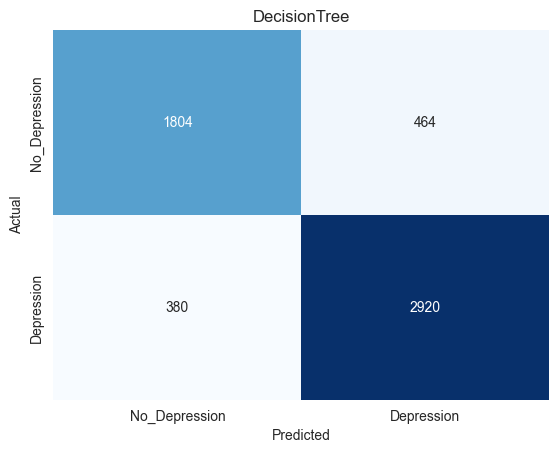

In [83]:
cm = confusion_matrix(y_test, new_pred)

sns.heatmap(cm, annot=True, fmt='0.0f', cbar=False, cmap='Blues', xticklabels=['No_Depression', 'Depression'], yticklabels=['No_Depression', 'Depression'])
plt.title('DecisionTree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [84]:
print(classification_report(y_test, new_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2268
           1       0.86      0.88      0.87      3300

    accuracy                           0.85      5568
   macro avg       0.84      0.84      0.84      5568
weighted avg       0.85      0.85      0.85      5568



In [85]:
accuracy = metrics.accuracy_score(y_test, new_pred)
accuracy

0.8484195402298851

In [86]:
clf_boost = GradientBoostingClassifier()

clf_boost.fit(X_train, y_train)

GradientBoostingClassifier()

In [87]:
feature_name = clf_boost.feature_names_in_

In [88]:
feature_values = clf_boost.feature_importances_

In [89]:
pd.DataFrame(data = feature_values, index = feature_name, columns = ['Feature_importance']).sort_values(by='Feature_importance')[::-1]*100

,Feature_importance
Have you ever had suicidal thoughts ?,51.871124
Academic Pressure,23.799506
Financial Stress,11.347235
Age,4.698691
Work/Study Hours,2.797158
Dietary Habits,2.761283
Study Satisfaction,1.573132
Sleep Duration,0.597942
CGPA,0.283662
Family History of Mental Illness,0.157133


## Prediction system

In [126]:
import pickle

In [127]:
pickle.dump(clf, open('clf.pkl','wb'))

In [128]:
pickle.dump(le, open('le.pkl', 'wb'))

In [129]:
df.head(2)

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,5.0,8.97,2.0,6.0,2.0,3,1,3.0,1.0,0,1
1,0,24.0,2.0,5.90,5.0,6.0,1.0,10,0,3.0,2.0,1,0


In [149]:
user_input = pd.DataFrame([["Male", 33, 5, 8.97,2.0, 6.0, "Healthy", 'B.Pharm', "No", 3.0, 1.0, "No"],
                          ["Male", 33, 5, 8.97, 2, 6, "Healthy", "B.com", "Yes", 3, 3, "Yes"]], columns = X_train.columns)

In [150]:
user_input

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,33,5,8.97,2.0,6.0,Healthy,B.Pharm,No,3.0,1.0,No
1,Male,33,5,8.97,2.0,6.0,Healthy,B.com,Yes,3.0,3.0,Yes


In [151]:
pickle.load(open('clf.pkl', 'rb'))
pickle.load(open('le.pkl', 'rb'))

LabelEncoder()

In [152]:
user_input['Dietary Habits'] = user_input['Dietary Habits'].map({'Unhealthy' : 0, 'Moderate' : 1, 'Healthy' : 2, 'Others' : 0})

In [153]:
user_input['Gender'] = le.fit_transform(user_input['Gender']) ## 0 -> Male 0 -> Female

In [154]:
user_input['Family History of Mental Illness'] = le.fit_transform(user_input['Family History of Mental Illness']) ## 0 -> No 1 -> Yes

In [155]:
user_input['Have you ever had suicidal thoughts ?'] = le.fit_transform(user_input['Have you ever had suicidal thoughts ?']) ## 1 -> Yes 0 -> No

In [156]:
user_input['Degree'] = le.fit_transform(user_input['Degree'])

In [157]:
user_input

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0,33,5,8.97,2.0,6.0,2,0,0,3.0,1.0,0
1,0,33,5,8.97,2.0,6.0,2,1,1,3.0,3.0,1


In [162]:
prediction_id = clf.predict(user_input)

In [163]:
prediction_id

array([0, 1])

In [100]:
user_input.isnull().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           1
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
dtype: int64

In [ ]:
degree_mapping = {'B.Pharm':3, 'BSc':10, 'BA':5, 'BCA':7, 'M.Tech':17, 'PhD':27, 'Class 12':11, 'B.Ed':2,
       'LLB':12, 'BE':8, 'M.Ed':15, 'MSc':25, 'BHM':9, 'M.Pharm':16, 'MCA':21, 'MA':18, 'B.Com':1,
       'MD':22, 'MBA':19, 'MBBS':20, 'M.Com':14, 'B.Arch':0, 'LLM':13, 'B.Tech':4, 'BBA':6,
       'ME':23, 'MHM':24, 'Others':26}

In [139]:
df['Degree'].unique()

array([ 3, 10,  5,  7, 17, 27, 11,  2, 12,  8, 15, 25,  9, 16, 21, 18,  1,
       22, 19, 20, 14,  0, 13,  4,  6, 23, 24, 26])